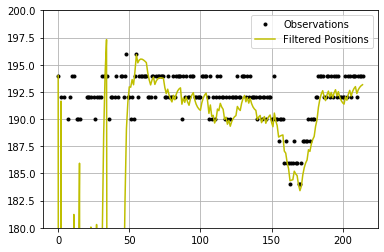

In [64]:
import numpy as np
import pandas as pd
from pykalman import KalmanFilter
from numpy import ma
import matplotlib.pyplot as plt

# Reading data
observations = pd.read_csv('Q66687.csv')
rearwheel_y = observations['rearwheel_y'].to_list()
rearwheel_x = observations['rearwheel_x'].to_list()

# Locate and clip relevant snippet of motion, removing unecessary data at the beginning and end
rearwheel_y = rearwheel_y[385: 600]
rearwheel_x = rearwheel_x[385: 600]

#rearwheel_y = np.sin(20*time) + 10

# The numpy.ma module provides a convenient way to address the issue of dropout, with masked arrays.
# When an element of the mask is False, the corresponding element of the associated array 
# is valid and is said to be unmasked.
# When an element of the mask is True, the corresponding element of the associated array 
# is said to be masked (invalid).
rearwheel_x = ma.masked_values(rearwheel_x, 0)
rearwheel_y = ma.masked_values(rearwheel_y, 0)
measurements = np.array([rearwheel_x, rearwheel_y])

# initial_state_mean
Xbar = np.array([rearwheel_x[0],0,0,rearwheel_y[0],0,0]).transpose();
# initial_state_covariance
P0 = 100*np.identity(6)
n_timesteps = len(measurements[0])
n_dim_state = 6
filtered_state_means = np.zeros((n_timesteps, n_dim_state))
filtered_state_covariances = np.zeros((n_timesteps, n_dim_state, n_dim_state))

# Kalman-Filter initialization
DeltaT = 0.01668335
A = np.array([[1, DeltaT, 0.5*DeltaT**2, 0, 0, 0], 
              [0, 1, DeltaT, 0, 0, 0], 
              [ 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 1, DeltaT, 0.5*DeltaT**2], 
              [0, 0, 0, 0, 1, DeltaT], 
              [0, 0, 0, 0, 0, 1]])
B = np.array([[0, 0],
             [0, 0],
             [1, 0],
             [0, 0],
             [0, 0],
             [0, 1],])
SigmaEta = np.array([[1,0], [0,1]]) # Assume eta covariance is unit...
#Q = B @ B.transpose() * 0.0001
Q = np.identity(6) * 0.00001
R = np.array([[1,0],[0,1]])*0.00005
H = np.array([[1,0,0,0,0,0],[0,0,0,1,0,0]])              
kf = KalmanFilter(transition_matrices = A,
                  observation_matrices = H,
                  transition_covariance = Q,
                  observation_covariance = R,
                  initial_state_mean = Xbar,
                  initial_state_covariance = P0)
# iterative estimation for each new measurement
for t in range(n_timesteps):
    if t == 0:
        filtered_state_means[t] = Xbar
        filtered_state_covariances[t] = P0
    elif t != 0:
        filtered_state_means[t], filtered_state_covariances[t] = (
        kf.filter_update(
            filtered_state_means[t-1],
            filtered_state_covariances[t-1],
            observation = measurements[:,t])
        )

# plot of the resulting trajectory
plt.figure()
plt.plot(rearwheel_y, 'k.', label = 'Observations')
plt.plot(filtered_state_means[:, 3], "y-", label="Filtered Positions", markersize=1)
plt.ylim(180, 200)
plt.grid()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

In [66]:
import random

projects = ['Music Analysis', 'Car Finder', 'Ice-cream Loyalty', 
            'Nutritional Cooking', 'Mutual Fund Contrast', 'Expense Manager']

random.shuffle(projects)
random.shuffle(projects)
random.shuffle(projects)
random.shuffle(projects)

print(projects)

['Mutual Fund Contrast', 'Nutritional Cooking', 'Car Finder', 'Music Analysis', 'Ice-cream Loyalty', 'Expense Manager']
